## **CASO 2 AGRUPAMIENTO: ENTIDAD FINANCIERA**

Ustedes hacen parte del equipo de datos del área de mercadeo de una entidad financiera. El equipo comercial quiere diseñar una nueva estrategia de atracción para cerrar clientes de una segunda tarjeta de crédito. Teniendo en cuenta que el comportamiento del cliente es importante a la hora de entender el posible cierre de un negocio ustedes deciden diseñar un modelo de datos que permita establecer estos diferenciales para la estrategia.


En general el equipo de mercadeo cree que la mejor manera de repartir a los clientes es en **4 grupos**. Determine si esta opinión es razonable a la luz del modelamiento y de las métricas de desempeño.

## Metodología ASUM-DM

1. Entendimiento del Negocio: La entidad financiera busca atraer clientes para la aquisición de una segunda tarjeta de crédito, el objetivo es comprender las diferencias en el comportamiento de los clientes para brindar un mejor servicio a la hora de cerrar un negocio.

2. Enfoque Analítico: Diseñar un experimento que permita agrupar a los clientes en una cantidad de grupos beneficios para identificar los comportamientos diferenciadores.

3. Requerimiento de datos: Datos bancarios de los clientes

4. Recolección de datos:

    <img src="../Computación Científica/Datasets/Datos_Entidad_Bancaria.png" alt="Datos EB" width="500" />

5. Entendimiento de datos:
    - Identificar datos nulos
    - Exploración univariada de los datos 
    - Exploración multivariada de los datos
    - Identificación de correlación y multicolinealidad

In [1]:
# Tratamiento estructurado de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Advertencias
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Computación Científica/Datasets/datos_caso_2.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Verificación de la existencia de datos nulos

In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

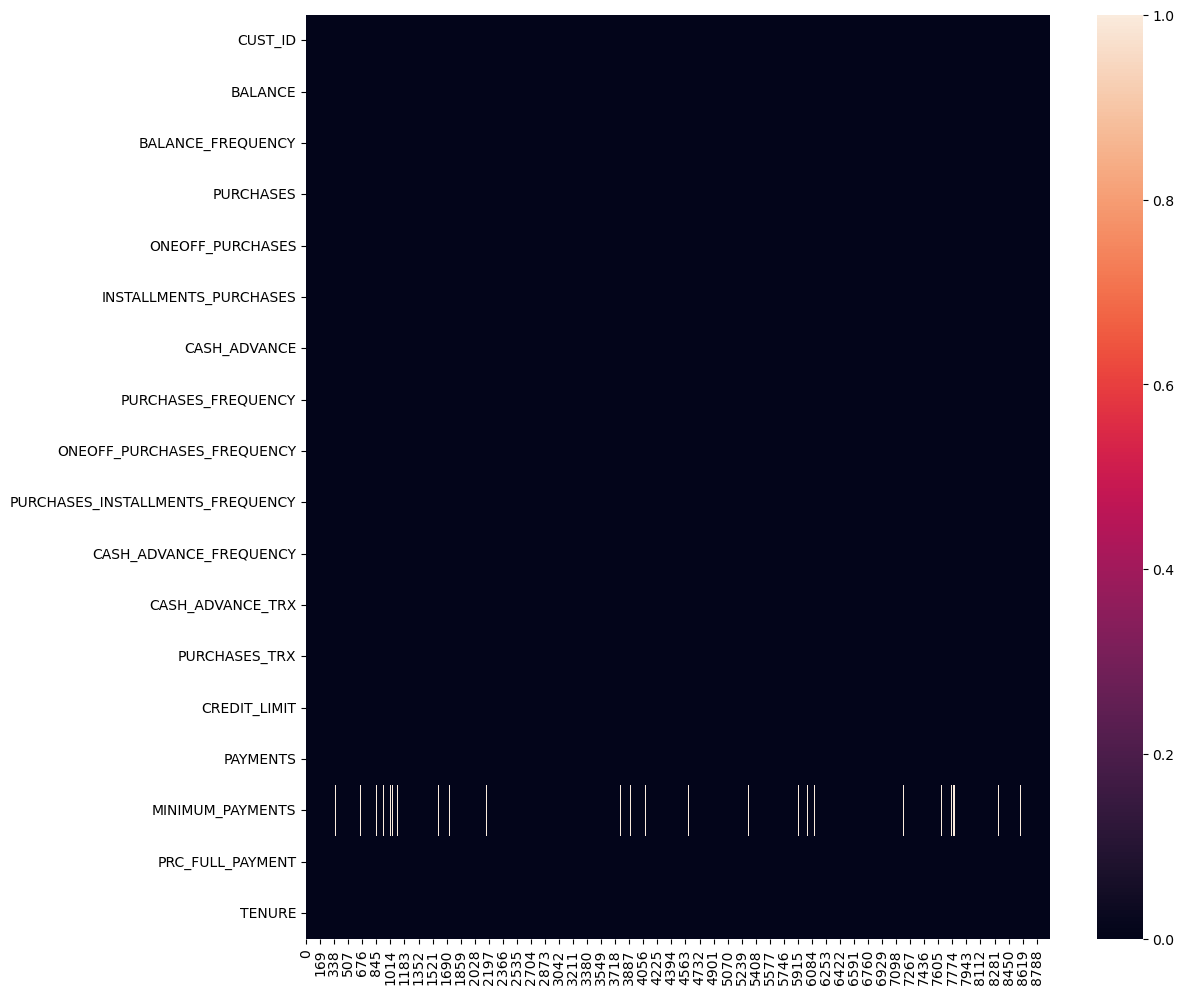

In [6]:
plt.figure(figsize=(12, 12))
data.isnull().transpose().pipe(lambda df: sns.heatmap(data = df))
plt.show()

**ANÁLISIS:** los datos nulos pertenecientes a MINIMUM_PAYMENTS están repartidos a lo largo de todos los registros

### Exploración Univariada de los datos

**HISTOGRAMAS DE FRECUENCIA**

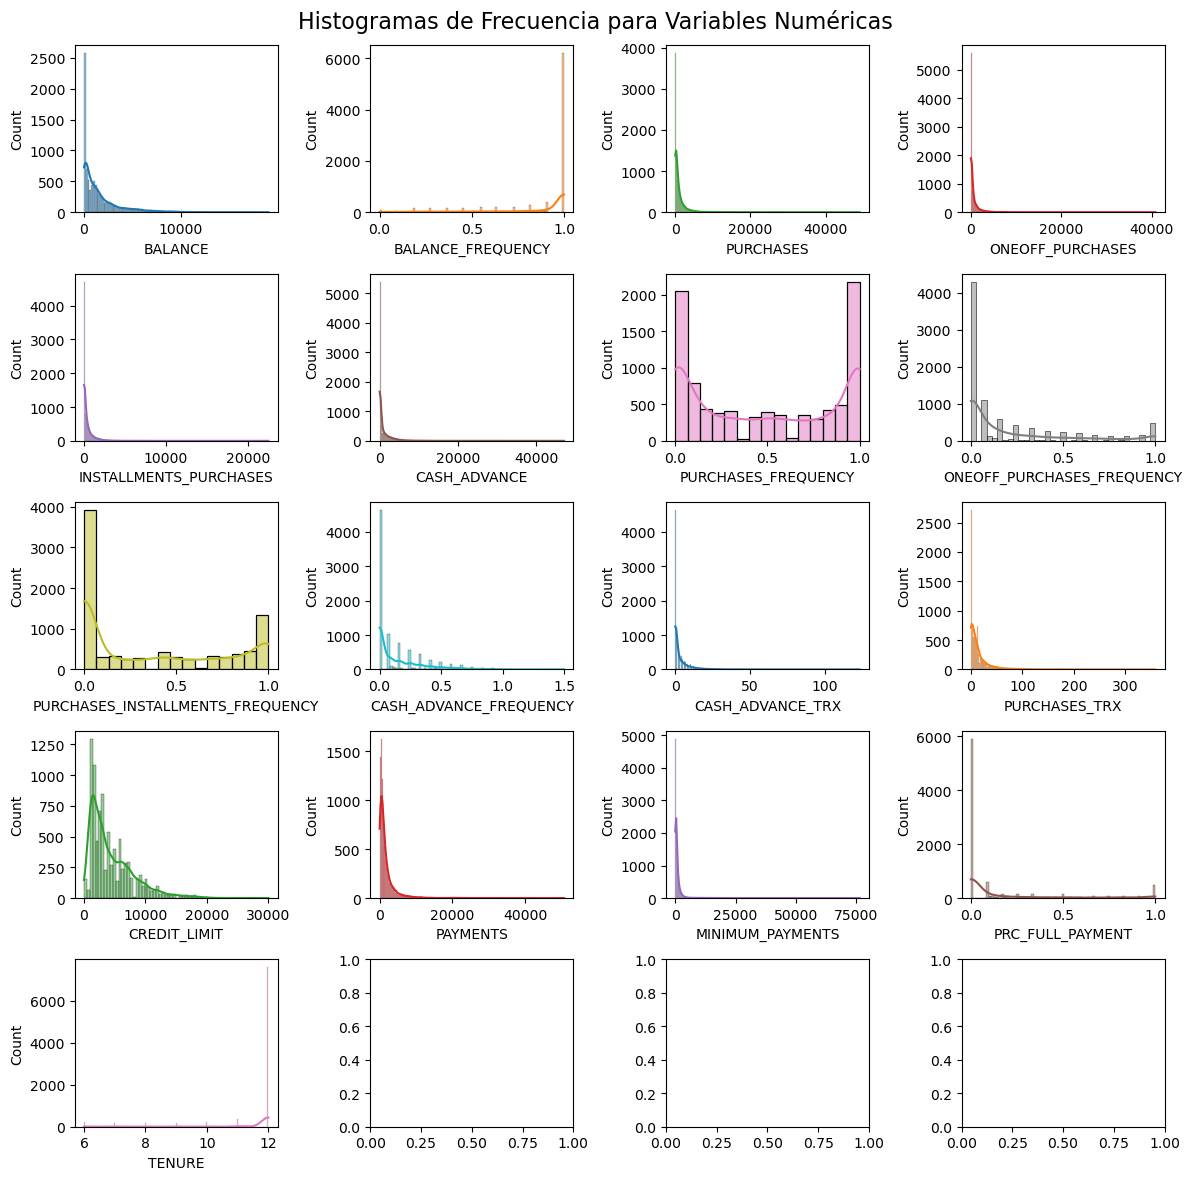

In [9]:
fig, ax = plt.subplots(5, 4, figsize=(12, 12))
ax = ax.flat
num_col = data.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(num_col):
    sns.histplot(
        data = data,
        x = col,
        kde = True,
        color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
        ax = ax[i]
    )

fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Histogramas de Frecuencia para Variables Numéricas', fontsize=16)
plt.show()

**ANÁLISIS**

- BALANCE: LogN -> Dinero actúal de cada cliente
- BALANCE_FREQUENCY (Relación): 0-1 (LogN Invertidad) -> Riesgo del cliente (Tiene un mayor punto de frecuencia hacia 1, lo que indica que hay más clientes que implican riesgo)

<br>

- PURCHASES: LogN -> Monto de compras realizado
- ONEOFF_PURCHASES: LogN -> Máximo de compras realizado en una cuota
- INSTALLMENTS_PURCHASES: LogN -> Monto de compras realizadas a crédito
- CASH_ADVANCE: LogN -> Avances en efectivo

<br>

- PURCHASES_FREQUENCY (Calificación): 0-1 (Bimodal en los extremos) -> Frecuencia de compras
- ONEOFFPURCHASESFREQUENCY (Calificación): 0-1 (LogN con un pequeño pico en 1) -> Frecuencia de compras a una sola cuota
- PURCHASESINSTALLMENTSFREQUENCY (Calificación): 0-1 (LogN con un pequeño pico en 1) -> Frecuencia de compras a crédito
- CASHADVANCEFREQUENCY (Calificación): 0-1 (LogN) -> Frecuencia de avances **(HAY VALORES MAYORES A 0-1, NO TIENE LÓGICA CON LOS DATOS)**

<br>

- CASHADVANCETRX: LogN -> Número de transacciones realizadas con avances
- PURCHASES_TRX: LogN -> Número de transacciones de compras hechas
- CREDIT_LIMIT: LogN -> Límite de crédito
- PAYMENTS: LogN -> Monto de pagos
- MINIMUM_PAYMENTS: LogN -> Pagos completos hechos por el usuario
- TENURE: LogN Invertidad -> Tenencia de tarjetas de crédito